# Задание

<b>1. (2 балла)</b> Постройте двумерный график вашей любимой функции (если такой нет, полюбите функцию из https://docs.scipy.org/doc/numpy/reference/routines.math.html). Отметьте на этом графике максимальное и минимальное значение

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

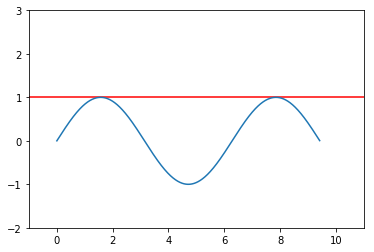

In [2]:
x = np.arange(0, np.pi * 3, 0.01)
y = np.sin(x)
plt.axhline(np.max(y), color='r')
plt.axis([ -1, 11, -2, 3,])
_ = plt.plot(x, y)

<b>2. (2 балла)</b> Нормализуйте вектор y-координат. Для этого отнимите среднее и поделите на стандартное отклонение. Постройте гистограмму значений получившегося вектора. На гистограмме отметьте среднее и точки $-\sigma$ , $+\sigma$

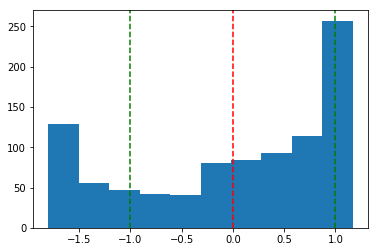

In [3]:
y = np.sin(x) * 5
y -= y.mean()
y /= y.std()
plt.hist(y);
plt.axvline(np.mean(y), linestyle='--', color='r')
plt.axvline(np.mean(y) - np.std(y), linestyle='--', color='g')
plt.axvline(np.mean(y) + np.std(y), linestyle='--', color='g');

<b>3. (3 балла)</b> Николай Иванович играет в игру: он берет из мешка с числами от 1 до 1000 
    случайное число, записывает его на бумажке и возвращает число в мешок. Так он поступает 1000 раз.
    После этого Николай Иванович считает, сколько разных чисел у него на бумажке. Посчитайте и вы ;)
    
Постройте график, где по X будут числа в порядке убывания количества упоминаний на бумажке, а по Y - количество упоминаний. Уместно построить график в логарифмической шкале по X

6340


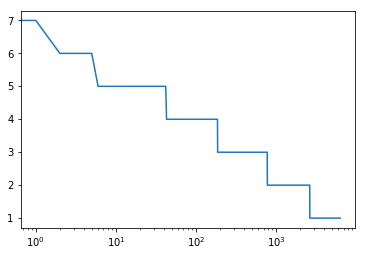

In [4]:
bag = np.arange(1, 10001)
paper = np.random.choice(bag, size=10000)

print(len(set(paper))) 

from collections import defaultdict
uniq_numbers = defaultdict(int)

for number in paper:
    uniq_numbers[number] += 1

uniq_numbers_counts = sorted(list(uniq_numbers.values()), reverse=True)
plt.plot(uniq_numbers_counts) 
plt.xscale('log');

<b>+3 балла </b> Проверьте, что выборки i.i.d. (independent, identically distributed).

In [5]:
# Посчитаем корелляцию между двумя бутстрапированными выборками:
np.corrcoef(np.random.choice(bag, size=1000),
            np.random.choice(bag, size=1000))

array([[1.        , 0.04974041],
       [0.04974041, 1.        ]])

In [6]:
# Корреляция 0.003 -т.е. данные не кореллируют

In [7]:
# Посчитаем какой-нибудь непараметрический критерий на одинаковость распределений. 
# Например, подойдет критерий Уилкоксона
import scipy
scipy.stats.wilcoxon(np.random.choice(bag, size=1000), 
                     np.random.choice(bag, size=1000)) 

WilcoxonResult(statistic=232270.5, pvalue=0.04905887041314707)

In [8]:
# pvalue ~ 0.10. Значит, с вероятностью 10% мы можем получить 
# такие же или более значимые различия между выборками,
# если они сгенерированны из одного распределения

<b>4. (2 балла)</b> постройте трехмерный график вашей любимой функции от 2-х переменных

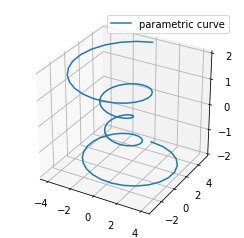

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=plt.figaspect(1)) 
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta) 
ax.plot(x, y, z, label='parametric curve')
ax.legend();